# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=62130e969afc19433f28b95874ee9f6caaf1d1023d8f7ff03c01051d0337fd0f
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [3]:
if not os.path.exists("malgun.ttf"): 
    wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
    fm.fontManager.addfont("malgun.ttf")
if plt.rcParams['font.family']!= ["Malgun Gothic"]:
    plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [4]:
os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [5]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,722 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and di

In [6]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [8]:
path = '/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/train.csv'
data = pd.read_csv(path)
data.tail()

,text,label
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격
3705,상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...,이론


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [9]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.5 MB/s eta 0:00:00


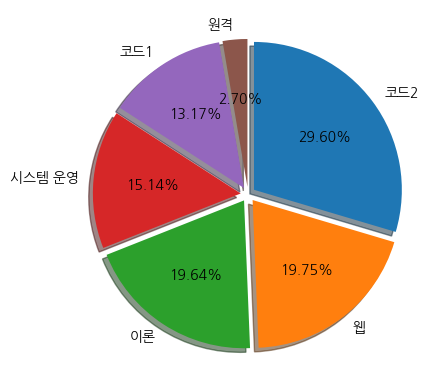

In [10]:
# 문의 유형 분포 확인
import matplotlib.pyplot as plt
import koreanize_matplotlib

temp = data['label'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle = 90, counterclock = False,
        explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05], shadow = True)
plt.show()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
5,"저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...",이론
6,PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...,웹
7,범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...,이론
8,첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...,코드1
9,다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...,웹


----------------------------------------------------------------------------------------------------


코드2       0.296006
웹         0.197518
이론        0.196438
시스템 운영    0.151376
코드1       0.131678
원격        0.026983
Name: label, dtype: float64

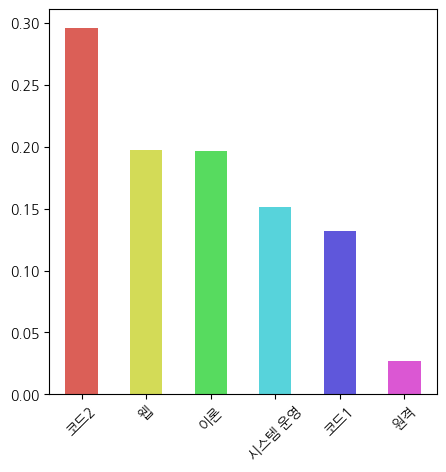

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB
----------------------------------------------------------------------------------------------------


,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


In [15]:
display(data.head(10))
# 라벨 분포 확인... sns.countplot 쓰니까 오류남 그래서 이걸로 확인
data['label'].value_counts()
print("-" * 100)
norm_label = data.label.value_counts(normalize = True)
display(norm_label)
norm_label.plot.bar(figsize = (5, 5), color = sns.color_palette('hls', n_colors = len(norm_label)))
plt.xticks(rotation=45)
plt.show()
print("-" * 100)
data.info()
print("-" * 100)
display(data.describe(include = 'all'))

In [12]:
# data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [13]:
# 결측치 확인
data.isna().sum()

text     0
label    0
dtype: int64

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [14]:
# 문의 내용 길이 분포 확인
text = np.array(data['text']) 
text

array(['self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, 100)) for K in Ks])\n1. 여기서 커널사이즈 K,100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다.',
       '현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요... 막혀서 뭘 할 수가 없네요.. 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다. 이유가 뭘까요',
       'glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 포함되면 제대로 작동하지 않는 것 같아 질문 드립니다.\n\n제공해주신 파일에 AIVLE_3rd[Team] 폴더가 포함되어 있는데, 이 폴더 안에는 glob이 정상적으로 작동하지 않습니다.',
       ...,
       '수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프라 구조에 대해서 이해해보는 시간\n- 비록 직접 인프라를 구축 및 설계는 하지 않을지라도 어떻게 구성되어 있고 어떻게 돌아가는지는 알아보자.\n적절한 비유일지는 모르겠으나, 운전을 하는 게 목표라고 할 때, \n우리가 자동차를 직접 설계하고 만들지는 않아도 자동차가 연료를 연소시키면서 엔진에 동력을 전달해서 그 힘으로 움직인다. 라는 식으로 원리와 과정을 아는 것과 같은 맥락...이려나요?\n\n2. (DX과정이므로 DX 컨설턴트 및 관련 직무를 위한 교육이라고 가정할 때) DX 관련 업무에서 실제로 IT 인프라를 구축해야하는 경우가 있으며, 이 때 실제 장비를 가지고 하나씩 연결해보고 시도해보기에는 물리적(시간, 돈, 장소 등)제약이 있으므로 가상으로 해본다.\n\n3. 적절한 비유일지는 모르겠으나...\n수학에서 미적분을 배우는 게 최종 목표라고 했을 때, 처음부터 미적분을 학습시킬 수 없으니 그 기초가 되는 수열, 수열의 극한, 함수의 극한 순으로 배

In [15]:
length = []
for txt in text:
    txtLength = len(txt)
    length.append(txtLength)

print(length)

[144, 119, 147, 279, 144, 131, 161, 325, 430, 134, 127, 183, 42, 348, 101, 233, 154, 119, 318, 61, 97, 54, 120, 198, 267, 59, 257, 1237, 265, 238, 333, 101, 281, 185, 138, 180, 83, 187, 102, 436, 142, 183, 48, 69, 555, 73, 114, 272, 51, 158, 61, 118, 141, 75, 81, 321, 70, 239, 180, 108, 35, 123, 257, 77, 99, 158, 13, 133, 116, 117, 75, 263, 38, 1188, 166, 61, 43, 79, 68, 349, 179, 117, 223, 56, 41, 391, 304, 196, 226, 27, 673, 118, 348, 835, 249, 95, 67, 1122, 83, 102, 65, 142, 63, 858, 90, 222, 271, 40, 448, 50, 95, 56, 97, 84, 277, 104, 806, 45, 71, 103, 55, 142, 135, 546, 345, 59, 42, 356, 288, 181, 117, 92, 83, 98, 74, 280, 44, 33, 264, 148, 105, 438, 170, 52, 61, 117, 138, 54, 257, 192, 262, 68, 101, 75, 67, 165, 284, 39, 133, 70, 133, 33, 246, 126, 127, 512, 27, 78, 52, 54, 622, 112, 71, 237, 71, 254, 191, 57, 43, 58, 116, 240, 391, 108, 67, 61, 105, 129, 97, 101, 113, 67, 187, 56, 603, 119, 87, 107, 68, 948, 199, 81, 34, 93, 54, 107, 128, 111, 1028, 257, 108, 165, 51, 574, 73, 5

In [16]:
# 최소 길이 index 및 문의 내용 확인
# min_value = min(length)
# min_index = length.index(min_value)
# print('최소 길이 index : ', min_index)

# 최소 길이 중복된 것도 있을 것 확인
indices_min = []

min_value = min(length)

for i in range(len(length)):
    if length[i] == min_value:
        indices_min.append(i)

print('최소 길이 index : ', indices_min)

print('756 : ', text[indices_min[0]])
print('841 : ', text[indices_min[1]])

최소 길이 index :  [756, 841]
756 :  원격 부탁드립니다
841 :  지원부탁드립니다!


In [17]:
# 최대 길이 index 및 문의 내용 확인
indices_max = []

max_value = max(length)

for i in range(len(length)):
    if length[i] == max_value:
        indices_max.append(i)

print('최대 길이 index : ', indices_max)

print('2561 : ', text[indices_max[0]])

최대 길이 index :  [2561]
2561 :  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)
   1768             plot_kws["color"] = color
   1769 
-&gt; 1770         p.plot_univariate_densi

------------------------------------------------------------------------------------------------------------------------
최대 길이 index :  2561 , 최대 길이 내용 :  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data

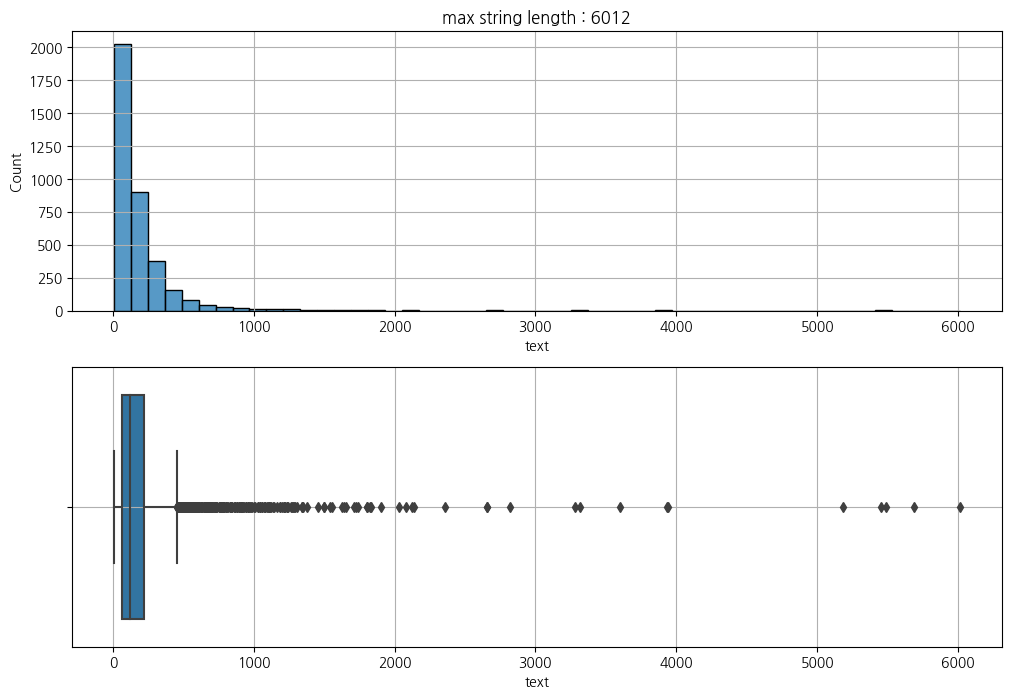

In [19]:
print("-" * 120)
text_length = data.text.str.len( )
print("최대 길이 index : ", text_length.argmax(), ", 최대 길이 내용 : ", data.text[text_length.argmax()])
print("최소 길이 index : ", text_length.argmin(), ", 최대 길이 내용 : ", data.text[text_length.argmin()])
plt.figure(figsize = (12, 8))
# 최대
plt.subplot(2, 1, 1, title = 'max string length : ' + str(max(text_length)))
sns.histplot(text_length, bins = 50)
plt.grid()

# 최소
plt.subplot(2, 1, 2)
sns.boxplot(x = text_length)
plt.grid()
plt.show()

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [18]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# text의 문장들의 하나의 list로 담아서 question 변수 선언
question_okt = data['text'].tolist()[:3705]
question_mecab = data['text'].tolist()[:3705]
question_komoran = data['text'].tolist()[:3705]
question_hannanum = data['text'].tolist()[:3705]
question_kkma = data['text'].tolist()[:3705]

In [20]:
# 한국어 사용자 사전 다운로드
# !wget -O mecab-ko-dic-2.1.1-20180720.tar.gz https://github.com/kmounlp/KMouNLP-Dictionary/releases/download/v1.0/mecab-ko-dic-2.1.1-20180720.tar.gz
# !tar xvfz mecab-ko-dic-2.1.1-20180720.tar.gz

- **mecab** 설치

In [21]:
# 정상 동작 확인
from konlpy.tag import Okt, Komoran, Kkma, Hannanum
from mecab import MeCab

okt = Okt()
mecab = MeCab()
komoran = Komoran(userdic='/tmp/dic.txt')
kkma = Kkma()
hannanum = Hannanum()

In [22]:
# konlpy의 Okt를 사용하여 question_okt의 모든 문장에 형태소 사이 사이 띄어쓰기 추가(품사 태깅, 명사 추출)
%%time

print("okt 변경 전 : ", question_okt[5])

for idx, sentence in enumerate(question_okt):
    question_okt[idx] = " ".join( okt.morphs(sentence) )

print("okt 변경 후 : ", question_okt[5])

okt 변경 전 :  저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한 서비스를 기획하는 기업이나 프로젝트를 희망하고 있습니다. 보건복지부에서 정신건강 관련하여 포털을 운영하고 있어서 이를 중심으로 문제정의를 해보았습니다.
okt 변경 후 :  저 는 헬 스케 어 , 그 중 에서도 정신건강 에 대해 관심 이 많습니다 . 디지털 치료 제 와 관련 한 서비스 를 기획 하는 기업 이나 프로젝트 를 희망 하고 있습니다 . 보건복지부 에서 정신건강 관련 하여 포털 을 운영 하고 있어서 이를 중심 으로 문 제 정의 를 해보았습니다 .
CPU times: user 1min 2s, sys: 665 ms, total: 1min 3s
Wall time: 52.1 s


In [23]:
# konlpy의 Mecab를 사용하여 question의 모든 문장에 형태소 사이 사이 띄어쓰기 추가(품사 태깅, 명사 추출)
%%time

print("mecab 변경 전 : ", question_mecab[5])

for idx, sentence in enumerate(question_mecab):
    question_mecab[idx] = mecab.morphs(sentence)

print("mecab 변경 후 : ", question_mecab[5])

mecab 변경 전 :  저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한 서비스를 기획하는 기업이나 프로젝트를 희망하고 있습니다. 보건복지부에서 정신건강 관련하여 포털을 운영하고 있어서 이를 중심으로 문제정의를 해보았습니다.
mecab 변경 후 :  ['저', '는', '헬스', '케', '어', ',', '그', '중', '에서', '도', '정신', '건강', '에', '대해', '관심', '이', '많', '습니다', '.', '디지털', '치료제', '와', '관련', '한', '서비스', '를', '기획', '하', '는', '기업', '이나', '프로젝트', '를', '희망', '하', '고', '있', '습니다', '.', '보건복지부', '에서', '정신', '건강', '관련', '하', '여', '포털', '을', '운영', '하', '고', '있', '어서', '이', '를', '중심', '으로', '문제', '정의', '를', '해', '보', '았', '습니다', '.']
CPU times: user 2.97 s, sys: 29.1 ms, total: 2.99 s
Wall time: 3 s


In [24]:
# %%time

# print("komoran 변경 전 : ", question_komoran[5])

# for idx, sentence in enumerate(question_komoran):
#     question_komoran[idx] = komoran.morphs(sentence)

# print("komoran 변경 후 : ", question_komoran[5])

komoran 변경 전 :  저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한 서비스를 기획하는 기업이나 프로젝트를 희망하고 있습니다. 보건복지부에서 정신건강 관련하여 포털을 운영하고 있어서 이를 중심으로 문제정의를 해보았습니다.


java.lang.NullPointerException: ignored

In [25]:
%%time

print("kkma 변경 전 : ", question_kkma[5])

for idx, sentence in enumerate(question_kkma):
    question_kkma[idx] = kkma.morphs(sentence)

print("kkma 변경 후 : ", question_kkma[5])

kkma 변경 전 :  저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한 서비스를 기획하는 기업이나 프로젝트를 희망하고 있습니다. 보건복지부에서 정신건강 관련하여 포털을 운영하고 있어서 이를 중심으로 문제정의를 해보았습니다.
kkma 변경 후 :  ['저', '는', '헬스', '케어', ',', '그중', '에서', '도', '정신', '건강', '에', '대하', '어', '관심', '이', '많', '습니다', '.', '디지털', '치료제', '와', '관련', '하', 'ㄴ', '서비스', '를', '기획', '하', '는', '기업', '이나', '프로젝트', '를', '희망', '하', '고', '있', '습니다', '.', '보건', '복지', '부', '에서', '정신', '건강', '관련', '하', '여', '포털', '을', '운영', '하', '고', '있', '어서', '이르', 'ㄹ', '중심', '으로', '문제', '정의', '를', '해보', '았', '습니다', '.']
CPU times: user 8min 17s, sys: 3.77 s, total: 8min 21s
Wall time: 5min 7s


In [26]:
# %%time

# print("hannanum 변경 전 : ", question_hannanum[5])

# for idx, sentence in enumerate(question_hannanum):
#     question_hannanum[idx] = hannanum.morphs(sentence)

# print("hannanum 변경 후 : ", question_hannanum[5])

In [20]:
import nltk
nltk.download('stopwords')
from konlpy.tag import Okt
from mecab import MeCab
okt = Okt()
mecab = MeCab()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
if 'okt_morphs' not in globals():
    %time okt_morphs = data.text.apply(lambda t:okt.morphs(str(t)))
    %time okt_nouns = data.text.apply(lambda t:okt.nouns(str(t)))
    %time okt_pos = data.text.apply(lambda t:okt.pos(str(t), norm = True, stem = True, join = True))

CPU times: user 49 s, sys: 509 ms, total: 49.5 s
Wall time: 54 s
CPU times: user 30.6 s, sys: 150 ms, total: 30.7 s
Wall time: 32.5 s
CPU times: user 1min 1s, sys: 217 ms, total: 1min 1s
Wall time: 1min 6s


In [22]:
def mecab_tokenizer(string):
    return list("/".join(res) for res in mecab.pos(str(string)))

In [28]:
if 'morphs' not in globals():
    %time morphs = data.text.apply(lambda t:mecab.morphs(str(t)))
    %time nouns = data.text.apply(lambda t:mecab.nouns(str(t)))
    %time pos_tuple = data.text.apply(lambda t:mecab.nouns(str(t)))
    %time pos = data.text.apply(mecab_tokenizer)

In [38]:
# Number of Samples / Number of words per sample
len(pos)/pos.apply(len).mean()

46.16679215855003

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기 = 총 vocab의 갯수
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [33]:
# if 'morphs' not in globals():
#     morphs = data.text.apply(lambda t:mecab.morphs(str(t)))
#     nouns = data.text.apply(lambda t:mecab.nouns(str(t)))
#     pos_tuple = data.text.apply(lambda t:mecab.nouns(str(t)))
#     pos = data.text.apply(mecab_tokenizer)

In [34]:
%%time
nltk_nouns = nltk.Text(nouns.explode())
nltk_nouns = nltk.Text([w for w in nltk_nouns if isinstance(w,str)])
nltk_morphs = nltk.Text(morphs.explode())
nltk_morphs = nltk.Text([w for w in nltk_morphs if isinstance(w,str)])
nltk_pos = nltk.Text(pos.explode())
nltk_pos_tuple = nltk.Text(pos_tuple.explode())

CPU times: user 358 ms, sys: 929 µs, total: 358 ms
Wall time: 382 ms


In [35]:
nltk_pos_tuple

<Text: 여기 커널 사이즈 은 단어 최대 길이 가정...>

In [36]:
display(nltk_nouns.vocab())
print(len(nltk_nouns.vocab()))

FreqDist({'것': 1093, '수': 986, '값': 801, '데이터': 783, '문제': 725, '때': 714, '코드': 712, '실습': 609, '번': 596, '파일': 581, ...})

3423


In [37]:
display(nltk_pos.vocab())
print(len(nltk_pos.vocab()))

FreqDist({'(/SSO': 6450, ',/SC': 6342, '-/SY': 5845, './SF': 5557, ')/SSC': 5517, '_/SY': 5425, './SY': 5226, '=/SY': 4081, '하/XSV': 3605, '가/JKS': 3373, ...})

11980


In [39]:
nltk_nouns.concordance("코드", lines = 10)
print("*" * 100)
nltk_nouns.similar("코드")

Displaying 10 of 712 matches:
 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 이유 뭘까요 사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함
석 아래 가설 검증 방향 접근 방법 비 비 생각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 
각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 큰따옴표 따옴표 백 슬래시 데이터베이스 전달 
슬라이딩 퍼즐 문제 관련 질문 줄 처 숫자 빈칸 공백 입력 것 이해 코드 작성 초기 퍼즐 상태 이동 상태 저장 이동 상태 이동 횟수 저장 상
리 이동 완료 배열 대응 값 경우 이동한 상태 저장 이동 횟수 다음 코드 작성 예제 입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부
입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부분 생각 것 코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드
코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드 참조 작성 에러 위 에러 문구 안녕 선형 회귀 로지스틱 회귀 때 사
 저 정의 오류 부분 지 모델 생성 때 방법 설정 선언 걸까요 에러 코드 어디 건지 수 금요일 홈페이지 점검 내용 금일 접속 곳 접속 코딩 
후 부팅 동일 증상 문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 
감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트 에러 데이터 
****************************************************************************************************
제 것 파일 값 번 실행 실습 문제 방법 문 수 오류 감사 위 발생 부분 에러 모델 함수 사용


In [40]:
nltk_nouns.concordance("탱크", lines = 10)
print("*" * 100)
nltk_nouns.similar("탱크")

Displaying 5 of 5 matches:
 안녕 스턴스 연결 명령어 사용 것 원격 번 검수 부탁 과제 메로나 탱크 보이 월드콘 과제 요일 입력 토 일 메로나 메로나 탱크 보이 탱크 
과제 메로나 탱크 보이 월드콘 과제 요일 입력 토 일 메로나 메로나 탱크 보이 탱크 보이 월드콘 월드콘 월 화 수 목 금 메로나 메로나 탱크
 탱크 보이 월드콘 과제 요일 입력 토 일 메로나 메로나 탱크 보이 탱크 보이 월드콘 월드콘 월 화 수 목 금 메로나 메로나 탱크 보이 탱크
탱크 보이 탱크 보이 월드콘 월드콘 월 화 수 목 금 메로나 메로나 탱크 보이 탱크 보이 월드콘 월드콘 입력 실습 어문 마지막 문제 전 프로
탱크 보이 월드콘 월드콘 월 화 수 목 금 메로나 메로나 탱크 보이 탱크 보이 월드콘 월드콘 입력 실습 어문 마지막 문제 전 프로그램 요일 
****************************************************************************************************



In [41]:
nltk_nouns.concordance("오류", lines = 10)
print("*" * 100)
nltk_nouns.similar("오류")

Displaying 10 of 521 matches:
 질문 포함 작동 것 질문 제공 파일 폴더 포함 폴더 안 정상 작동 오류 해결 안 폴더 안 이미지 저장 걸로 이해 실행 폴더 이미지 저장 질
 부분 부분 실행 파일 으로 생략 처음 데이터 열 때 옵션 적용 거 오류 걸까요 중간 원본 변경 걸까요 안녕 코딩 마스터스 에이 블러 코딩 
량 데 도움 진행 것 생각 감사 모델 예측 값 과정 옵티마 저 정의 오류 부분 지 모델 생성 때 방법 설정 선언 걸까요 에러 코드 어디 건지
용 금일 접속 곳 접속 코딩 마스터스 서버 접속 문 말씀 대로 이번 오류 발생 가능 원격 제어 운영 님 원격 문 글 오전 시간 얼마 실습 시
일 증상 문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트
문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트 에러 데
명 수 클라우드 문의 환경 세팅 완료 클라우드 에러 이전 과정 확인 오류 문 기능 헤드 부분 출력 바디 부분 출력 이거 해결 안녕 조 제출 
지 위 경우 그동안 문제 건지 문 전처리 부분 시간 관련 열 모델링 오류 기준일 열 형식 변경 해결 변수 가설 수립 때 변수 간 관계 이용 
수정 수 제출 파일 공백 파일 감사 더미 변수 생성 파트 이상 진행 오류 진행 진행 오류 나 뭐 문제 결과 첨부 마지막 안내 명령어 수행 에
일 공백 파일 감사 더미 변수 생성 파트 이상 진행 오류 진행 진행 오류 나 뭐 문제 결과 첨부 마지막 안내 명령어 수행 에러 메시지 원격 
****************************************************************************************************
에러 문제 것 코드 부분 수 사용 때 아래 시 해당 발생 질문 파일 이해 실행 출력 경우 위 값


In [42]:
nltk_nouns._word_context_index._word_to_contexts['코드']

FreqDist({('실습', '작성'): 12, ('다음', '작성'): 9, ('위', '실행'): 7, ('아래', '실행'): 5, ('에러', '발생'): 4, ('구', '도착'): 4, ('제', '다음'): 4, ('위', '결과'): 3, ('문제', '작성'): 3, ('방법', '작성'): 3, ...})

In [43]:
nltk_nouns._word_context_index._word_to_contexts['오류']

FreqDist({('다음', '발생'): 6, ('과정', '발생'): 6, ('실행', '발생'): 4, ('진행', '발생'): 3, ('결과', '발생'): 3, ('클릭', '발생'): 3, ('때', '발생'): 3, ('진행', '진행'): 2, ('오류', '해결'): 2, ('수', '코드'): 2, ...})

In [44]:
nltk_nouns._word_context_index._word_to_contexts['오류'][('위', '실행')]

1

In [45]:
nltk_nouns._word_context_index._word_to_contexts.conditions()

['여기',
 '커널',
 '사이즈',
 '은',
 '단어',
 '최대',
 '길이',
 '가정',
 '선언',
 '것',
 '이미지',
 '개',
 '업로드',
 '자바',
 '스크립트',
 '동적',
 '폼',
 '생성',
 '데',
 '클릭',
 '뭘',
 '수',
 '기본',
 '예제',
 '코드',
 '이유',
 '뭘까요',
 '사용',
 '때',
 '질문',
 '포함',
 '작동',
 '제공',
 '파일',
 '폴더',
 '안',
 '정상',
 '오류',
 '해결',
 '저장',
 '걸로',
 '이해',
 '실행',
 '저',
 '헬스',
 '중',
 '정신',
 '건강',
 '관심',
 '디지털',
 '치료제',
 '관련',
 '서비스',
 '기획',
 '기업',
 '프로젝트',
 '희망',
 '보건복지부',
 '포털',
 '운영',
 '이',
 '중심',
 '문제',
 '정의',
 '페이지',
 '제',
 '안사',
 '인프라',
 '구성',
 '웹',
 '서버',
 '솔루션',
 '대',
 '통합',
 '제시',
 '배치도',
 '작성',
 '이중화',
 '표현',
 '대로',
 '배치',
 '걸까요',
 '범주',
 '데이터',
 '숫자',
 '설명',
 '내용',
 '적응',
 '아래',
 '첨부',
 '실습',
 '서울시',
 '릉',
 '시간',
 '비',
 '생각',
 '의도',
 '값',
 '대별',
 '과',
 '방법',
 '출력',
 '변량',
 '분석',
 '가설',
 '검증',
 '방향',
 '접근',
 '번',
 '정답',
 '시',
 '패스',
 '요구',
 '건',
 '오답',
 '경우',
 '해킹',
 '공부',
 '리',
 '큰따옴표',
 '따옴표',
 '백',
 '슬래시',
 '데이터베이스',
 '전달',
 '위험',
 '걸',
 '문장',
 '를',
 '으로',
 '문자열',
 '프로그램',
 '사항',
 '다음',
 '입력',
 '추가',
 '수정',
 '조건',
 '형태',
 '인',
 '오타',
 '확인',


In [46]:
common_context = nltk_nouns.common_contexts(['코드', '오류'])

위_실행 위_오류 것_강의 위_부분 작성_위 때_것 다음_에러 작성_문제 다음_데이터 해당_실행


In [47]:
nltk_nouns._word_context_index.common_contexts(['코드', '오류'])

FreqDist({('위', '실행'): 2, ('위', '오류'): 2, ('것', '강의'): 2, ('위', '부분'): 2, ('작성', '위'): 2, ('때', '것'): 2, ('다음', '에러'): 2, ('작성', '문제'): 2, ('다음', '데이터'): 2, ('해당', '실행'): 2})

In [49]:
nltk_morphs.collocations(window_size = 5)
print('*'*50)
nltk_nouns.collocations(window_size = 5)
print('*'*50)
nltk_pos.collocations(window_size = 5)
print('*'*50)
nltk_pos_tuple.collocations(window_size = 5)
print('*'*50)

ignored_words = [u'\\', u'\n']
finder = collocations.BigramCollocationFinder.form_words(words)
finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(5) # only bigrams that appear 3+ times
print(finder.nbest(measures.pmi, 20))
tags = [t for w, t in nltk_pos_tuple]
finder = collocations.BigramCollocationFinder.from_words(tags)
print(finder.nbest(measures.pmi, 5))

Programs Python; site packages; Users User; lib site; int input; lib
packages; Users AppData; User AppData; Local Programs; AppData Local;
AppData Programs; User Local; level pnu; Local Python; Python Python;
map int; seoul moving; input split; Python lib; site django
**************************************************
데이터 프레임; 케이스 케이스; 라우팅 테이블; 인구수 인구수; 데이터 데이터; 충청북도 충청남도; 기준일 기준일; 테스트
케이스; 하이퍼 파라미터; 대구분 대구분; 리스트 리스트; 강원도 충청남도; 충청북도 강원도; 데이터 전처리; 문자열 문자열;
가중치 가중치; 주피터 노트북; 수원시 수원시; 홍길동 일지매; 충청남도 강원도
**************************************************
-/SY -/SY; \/SY \/SY; (/SSO )/SSC; //SC //SC; =/SY =/SY; [/SSO ]/SSC;
지/EC 않/VX; 습니다/EF ./SF; 수/NNB 있/VV; 안녕/NNG 세요/EP+EF; ./SY (/SSO; */SY
*/SY; gt/SL ;/SY; 나요/EF ?/SF; _/SY _/SY; \/SY Python/SL; ,/SC ,/SC;
Python/SL \/SY; -/SY -------------------------/SY; for/SL in/SL
**************************************************


TypeError: ignored

In [50]:
nltk_pos_tuple

<Text: 여기 커널 사이즈 은 단어 최대 길이 가정...>

In [53]:
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<B.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""

NP_grammar = "NP: {<Adjective>*<Noun>}"

In [55]:
parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(pos_tuple[data.text.str.len().argmin()])
# chunks_ko.draw()
display(chunks_ko)

ValueError: ignored

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

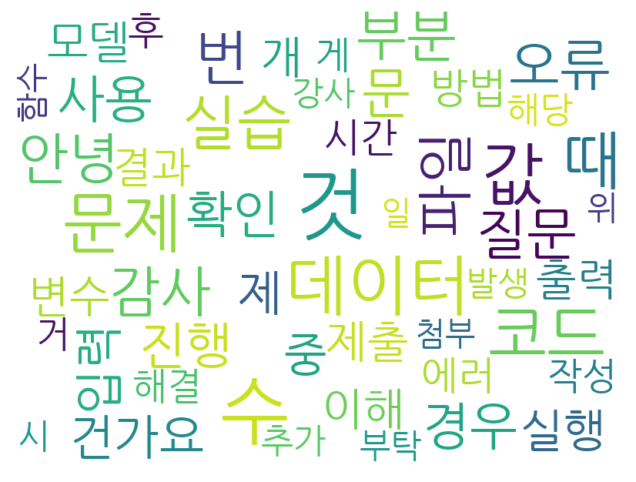

In [58]:
cloud = WordCloud(
        max_font_size = 100, max_words = 50,
        background_color = "white", relative_scaling = .5,
        width = 800, height = 600, font_path = FONT_PATH).generate_from_frequencies(nltk_nouns.vocab())
plt.figure(figsize = (12, 6))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [59]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass
    print("*"*120)
    if label is None:
        text_question = data['text'].reset_index(drop = True)
        display(data.label.value_counts())
        norm_label = data.label.value_counts(normalize = True)
        display(norm_label)
        norm_label.plt.bar(figsize = (5, 5), color = sns.color_palette('hls', n_colors = len(norm_label)))
    else:
        text_question = data.loc[data['label'] == label, 'text'].reset_index(drop = True)
        display(f"유형 : {label}", text_question.tail(10))
    # 데이터 확인
    display(text_question.describe(include = 'all'))
    # 데이터 길이 분포 시각화
    text_length = data.text.str.len( )
    print("최대 길이 index : ", text_length.argmax(), ", 최대 길이 내용 : ", data.text[text_length.argmax()])
    print("최소 길이 index : ", text_length.argmin(), ", 최대 길이 내용 : ", data.text[text_length.argmin()])
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 1, 1, title = 'max string length : ' + str(max(text_length)))
    sns.histplot(text_length, bins = 50)
    plt.grid()

    plt.subplot(2, 1, 2)
    sns.boxplot(x = text_length)
    plt.grid()
    plt.show()
    print("*"*120)

    nouns = text_question.apply(lambda t:mecab.nouns(str(t)))
    nouns = nltk.Text(nouns.explode())
    nouns = nltk.Text([w for w in nouns if isinstance(w, str)])

    # word cloud
    cloud = WordCloud(
        max_font_size = 100, max_words = 50,
        background_color = "white", relative_scaling = .5,
        width = 800, height = 600, font_path = FONT_PATH).generate(" ".join(nouns))
    plt.figure(figsize = (10, 8))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

    display(nouns.vacab().most_common(n = 10))

### 4-2. 각각의 문의 유형에 대해 실행합니다.

************************************************************************************************************************


'유형 : 시스템 운영'

551    보기 중 틀린 내용을 고르라는 문제인 것 같습니다. 맞는 내용이 3개이고, 틀린 내...
552                   솔루션 파일이 학습자료에 업로드 되어있습니다 혹시 오류인가요?
553    CNN, RNN 과정에서도 텐서플로우를 그대로 이용하는지 궁금합니다.\n\n이번 딥...
554    Q. AI 분류 모델 만들기\n전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는...
555                                      액세스 거부됨 이라고 뜹니다
556    제출하기 눌러도 오류 페이지가뜹니다\n\n[서비스 이용에 불편을 드려 죄송합니다.\...
557    코딩마스터스 제출한 문제에 대한 제출 코드는 다시 볼 수 없나요?? 다시 들어가니까...
558    복습을 하려고 강의 영상을 다시 보려는데 \n특정 구간만 보고 싶은데 그 구간의 설...
559    해당 질의응답 템플릿의 경우 자신의 파트에 대한 질문과 근거, 답변인지\n\n제가 ...
560    올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...
Name: text, dtype: object

count                                            561
unique                                           561
top       한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
freq                                               1
Name: text, dtype: object

최대 길이 index :  2561 , 최대 길이 내용 :  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)
   1768             plot_kws["color"] = color
   1769 
-&gt; 1770         p.plot_univariate_d

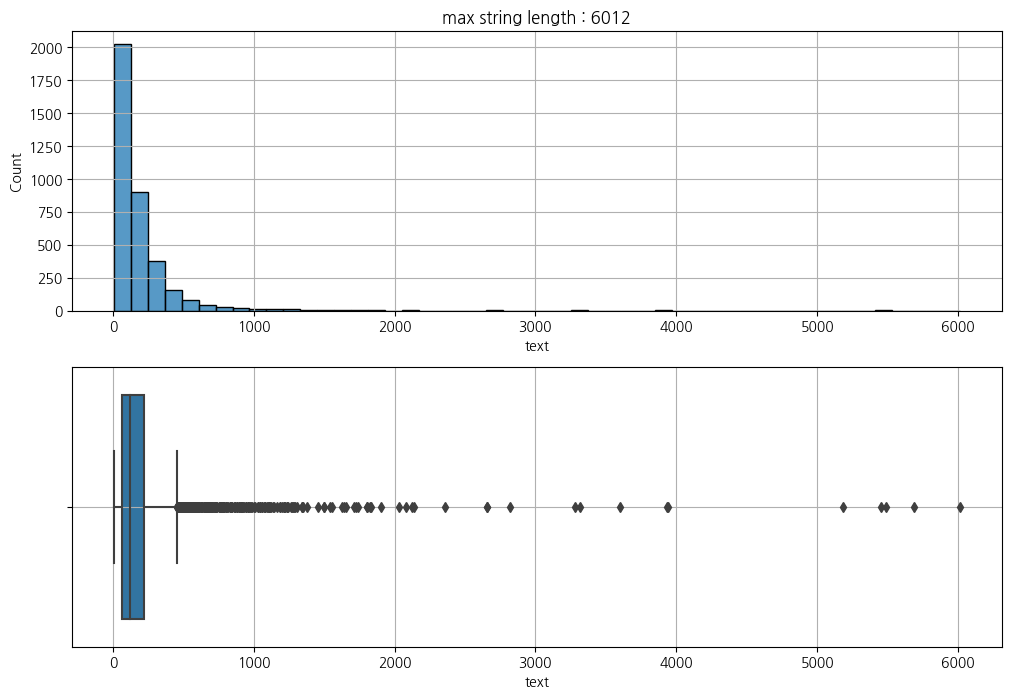

************************************************************************************************************************


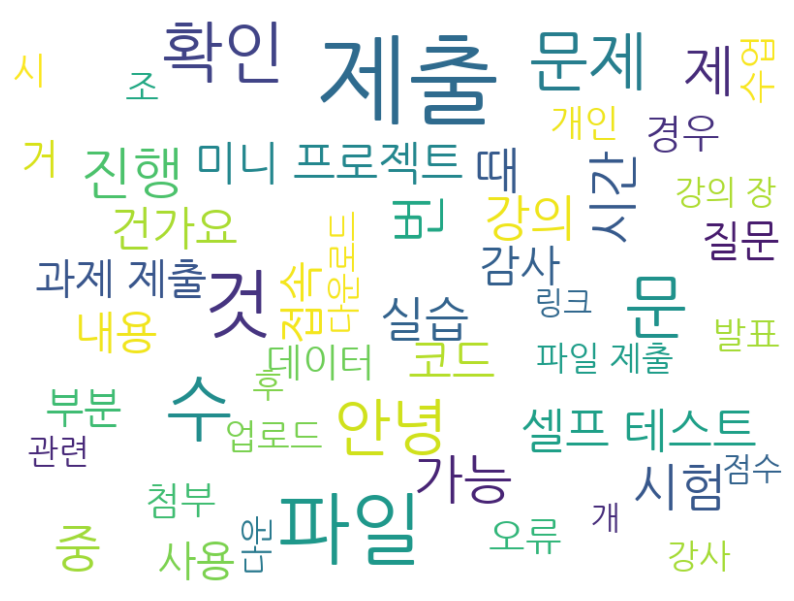

AttributeError: ignored

In [62]:
for label in sorted(data.label.unique()):
    text_analysis(data,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

### 5-2. Train Validation split

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용